# Reference
https://github.com/spacetelescope/notebooks/blob/master/notebooks/MAST/TESS/beginner_how_to_use_lc/beginner_how_to_use_lc.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits

In [2]:
fits_file = "https://archive.stsci.edu/missions/tess/tid/s0001/0000/0000/2515/5310/tess2018206045859-s0001-0000000025155310-0120-s_lc.fits"

In [3]:
#fits_file = "https://archive.stsci.edu/missions/tess/tid/s0001/0000/0000/2515/5310/tess2018206045859-s0001-0000000025155310-0120-s_tp.fits"

In [4]:
#fits_file = "https://archive.stsci.edu/missions/tess/tid/s0001/0000/0000/2515/5310/tess2018206190142-s0001-s0001-0000000025155310-00106_dvt.fits"

In [5]:
fits.info(fits_file)

Filename: /Users/robertmunoz/.astropy/cache/download/py3/965b2ad4aa34630130f09303aee051a0
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   20076R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


In [6]:
fits.getdata(fits_file, 1).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

In [7]:
with fits.open(fits_file, mode='readonly') as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

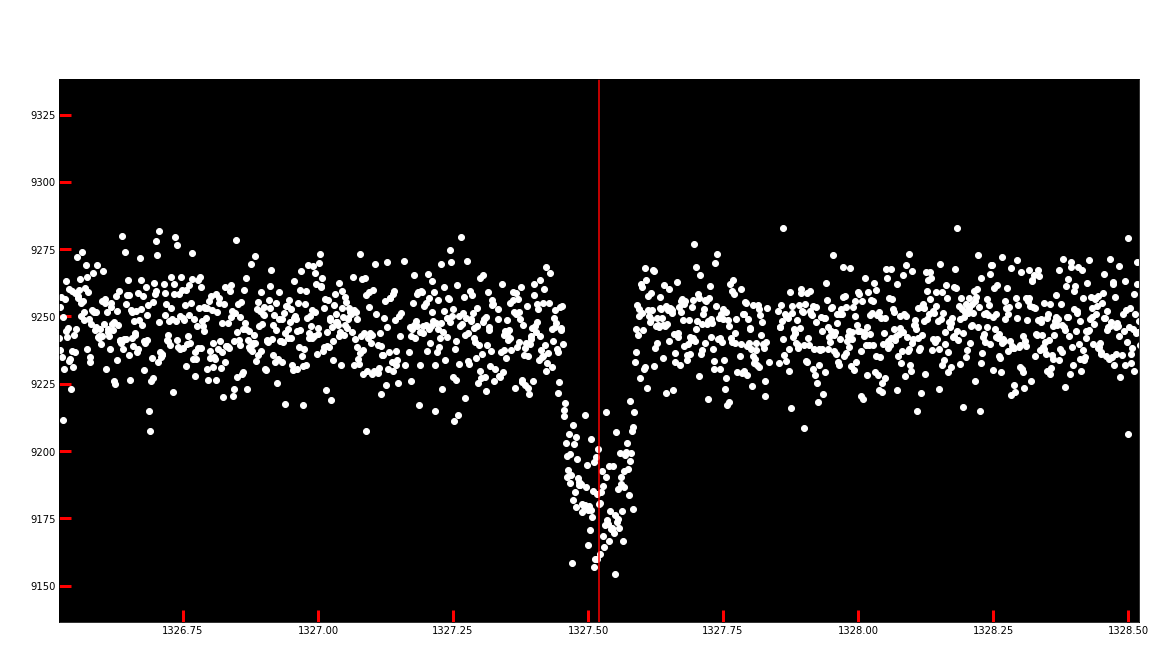

In [8]:
t0 = 1327.520678


fig,(ax) = plt.subplots(figsize=(20,10), ncols=1)
ax.plot(tess_bjds, pdcsap_fluxes, 'ko', c = 'white')

#Plot colors setup
c = 'white'
b = 'black'
ax.set_facecolor("black")
plt.tick_params(direction='in', axis='both',color='red', width=3, length=12, grid_linewidth=4)
plt.rc_context({'axes.edgecolor':b,
                'xtick.color':c,
                'ytick.color':c,
                'figure.facecolor':b,
               })

ax.axvline(x=t0, color='red')

ax.set_xlim(t0 - 1.0, t0 + 1.0)

fig.suptitle("TRANSIT METHOD", fontsize=23, color=c, fontweight='bold')
ax.set_ylabel("PDCSAP Flux (# of electrons / second)", color=c,fontsize=20)
ax.set_xlabel("Time (TBJD) - Days", fontsize=20, color = c)
ax.set_title("WASP-126 B Light Curve - Sector 1", fontsize=20, color=c, fontweight='bold')

plt.subplots_adjust(left=0.15)
plt.show()